In [9]:
'''
The simulations with synthetic data to test the behavior of MOS in different data structure.
'''

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Print df_degfieldd without truncation
pd.set_option('display.max_rows', None)


In [10]:
def compute_mci_hajime(A, At=None, mci_init=None, iter=250, output_other_side=False):
    M, N = A.shape
    if mci_init is None:
        assert np.all(np.isin(A,[0,1])), "A must be binary matrix if mci_init is not provided."
        mci_init = A.sum(axis=1)
    mci = mci_init.copy().values.reshape([-1,1])
    if At is None:
        At = A.T
    Aw = A/np.sum(A,axis=1).values.reshape(M,1)
    Atw = At/np.sum(At,axis=1).values.reshape(N,1)

    result_mci = pd.DataFrame(index=A.index)
    result_mci[f'iter_{0}'] = mci
    result_oci = pd.DataFrame(index=A.columns)
    for i in range(iter):
        oci = np.dot(Atw,mci)
        mci = np.dot(Aw,oci)
        # oci = (oci - oci.mean())/oci.std()
        # mci = (mci - mci.mean())/mci.std()
        oci = (oci - oci.min())/(oci.max()-oci.min()) + 1e-5
        mci = (mci - mci.min())/(mci.max()-mci.min()) + 1e-5
        result_mci[f'iter_{i+1}'] = mci
        result_oci[f'iter_{i+1}'] = oci
    if output_other_side:
        return result_mci, result_oci
    else:
        return result_mci


def binarize_by_rca(df_adj):
    # Construct the binary matrix.
    ## Methods: Threshold with certain number, or revealed comparative advantage.
    binarize_method='rca'
    major_share = (df_adj.T/df_adj.sum(axis=1) ).T #Share of an occupation within a major
    if binarize_method == 'rca':
        binarize_threshold = 1.
        occupation_share = df_adj.sum(axis=0)/df_adj.sum().sum()
        rca = major_share/occupation_share
        major_occupation_matrix = (rca>binarize_threshold).astype(int)

    return major_occupation_matrix




In [11]:
df_degfield = pd.read_csv('../data/processed_data/acs/degfield_mapping.csv', index_col=0)
df_degfieldd = pd.read_csv('../data/processed_data/acs/degfieldd_mapping.csv', index_col=0)
# 24 is engineering. 37	mathematics and statistics

major_ref_top_degfield = 21 #computer and information sciences
major_ref_bottom_degfield = 60 #fine arts
major_ref_top_degfieldd = 2102 #computer science
major_ref_bottom_degfieldd = 6000 #drama and theater arts

iterations = 25
binarize_method = 'rca'

soc_level = 2
major_var = 'degfieldd'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)




In [32]:
temp = pd.read_csv(f'../data/processed_data/acs/adj_degfield_soc2.csv',index_col=0)
temp.sum(axis=1)

major
11      8999
13      5801
14      5069
15      2072
19     40611
20      1996
21     30844
22      1108
23     47628
24     52314
25      5427
26      4010
29      5379
32      1060
33     15651
34      8942
36     21117
37      5120
40      5351
41     11067
48      3114
49      3202
50     11624
51       344
52     27071
53     20201
54      6429
55     43403
56      3152
57       317
59      2409
60     38178
61     44092
62    157804
64     10830
dtype: int64

In [12]:
df_degfieldd

,degfieldd_s
major,
1100,general agriculture
1101,agriculture production and management
1102,agricultural economics
1103,animal sciences
1104,food science
1105,plant science and agronomy
1106,soil science
1199,miscellaneous agriculture
1301,environmental science


In [13]:
df_degfield

,degfield_s
degfield,
11,agriculture
13,environment and natural resources
14,architecture
15,"area, ethnic, and civilization studies"
19,communications
20,communication technologies
21,computer and information sciences
22,cosmetology services and culinary arts
23,education administration and teaching


In [14]:
'''
SOC2
25	Education, Training, & Library Occupations
11	Management Occupations
13	Business & Financial Operations
17	Architecture & Engineering Occupations
15	Computer & Mathematical Occupations
29	Healthcare Practitioners and Technical
31	Healthcare Support Occupations
27	Arts, Design, Entertainment, Sports, & Media
21	Community & Social Services Occupations
23	Legal Occupations
33	Protective Service Occupations
19	Life, Physical, & Social Science Occupations
43	Office and Administrative Support Occupations
47	Construction and Extraction Occupations
49	Installation, Maintenance, and Repair
51	Production Occupations
35	Food Preparation & Serving Related
37	Building and Grounds Cleaning & Maintenance
39	Personal Care and Service Occupations
41	Sales and Related Occupations
53	Transportation & Material Moving
45	Farming, Fishing, and Forestry Occupations
55	Military Specific Occupations


'''

'\nSOC2\n25\tEducation, Training, & Library Occupations\n11\tManagement Occupations\n13\tBusiness & Financial Operations\n17\tArchitecture & Engineering Occupations\n15\tComputer & Mathematical Occupations\n29\tHealthcare Practitioners and Technical\n31\tHealthcare Support Occupations\n27\tArts, Design, Entertainment, Sports, & Media\n21\tCommunity & Social Services Occupations\n23\tLegal Occupations\n33\tProtective Service Occupations\n19\tLife, Physical, & Social Science Occupations\n43\tOffice and Administrative Support Occupations\n47\tConstruction and Extraction Occupations\n49\tInstallation, Maintenance, and Repair\n51\tProduction Occupations\n35\tFood Preparation & Serving Related\n37\tBuilding and Grounds Cleaning & Maintenance\n39\tPersonal Care and Service Occupations\n41\tSales and Related Occupations\n53\tTransportation & Material Moving\n45\tFarming, Fishing, and Forestry Occupations\n55\tMilitary Specific Occupations\n\n\n'

SOC2
degfield
2102
30844


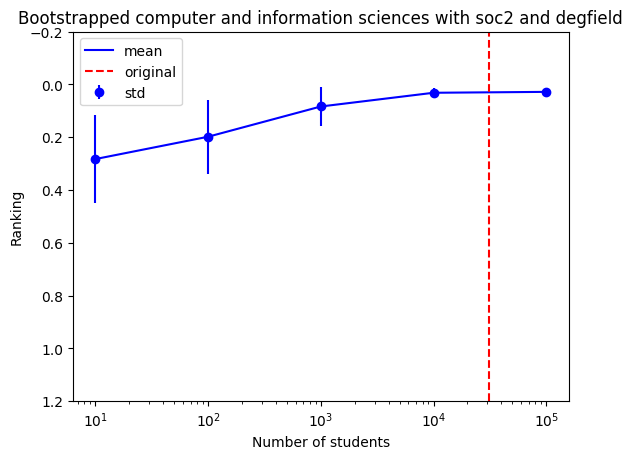

2300
47628


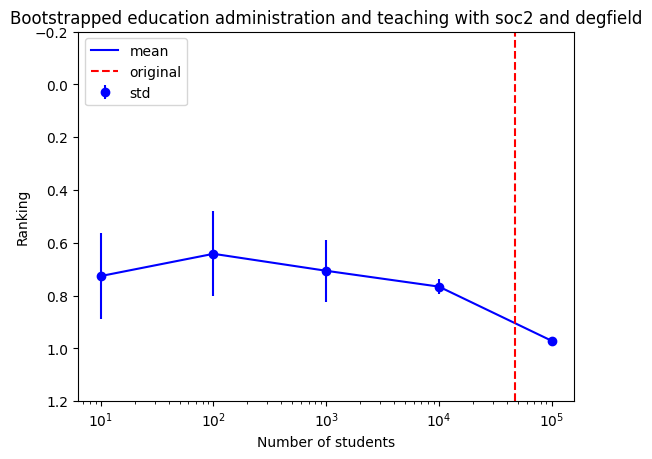

3702
5120


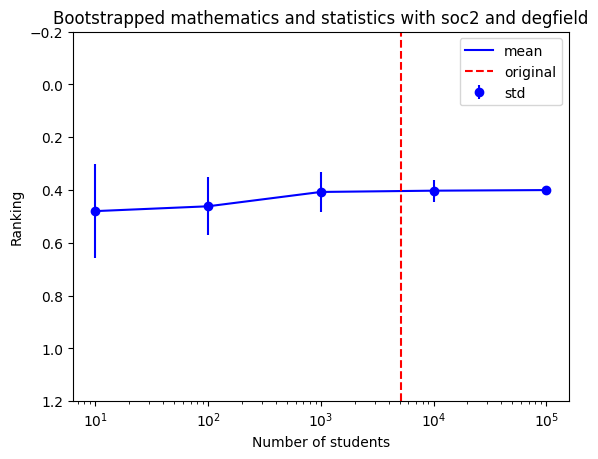

6107
44092


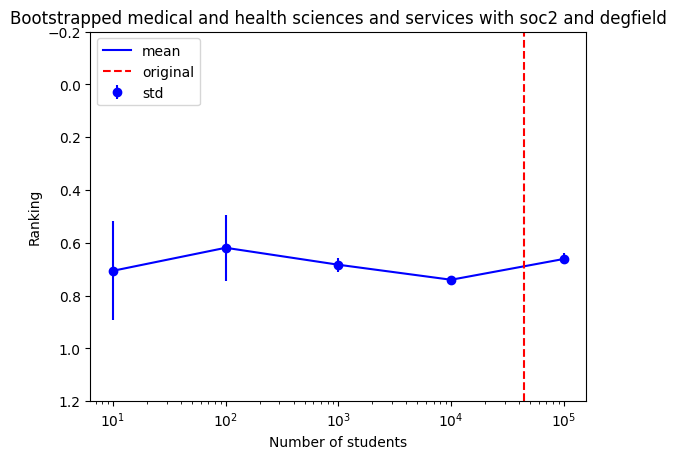

6201
157804


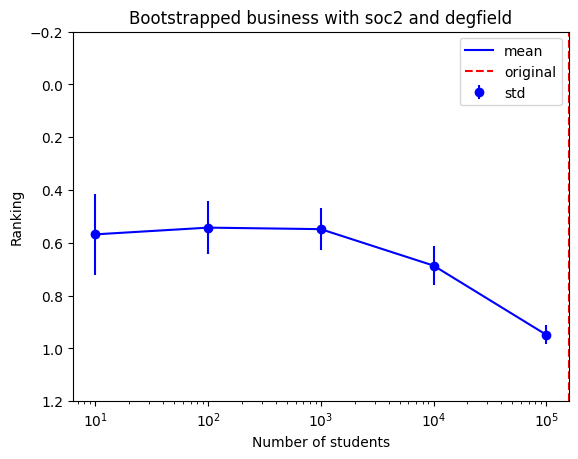

degfieldd
2102
18037


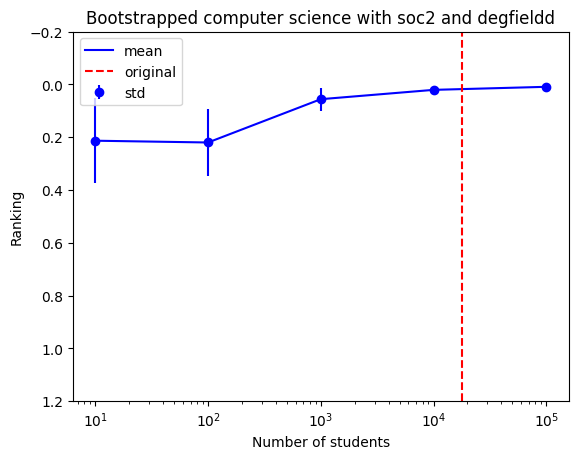

2300
11795


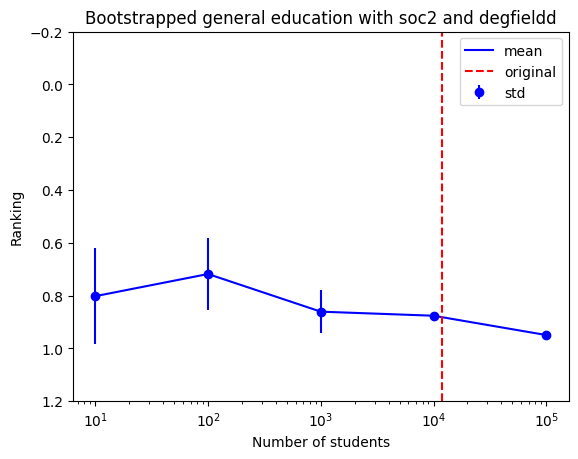

3702
349


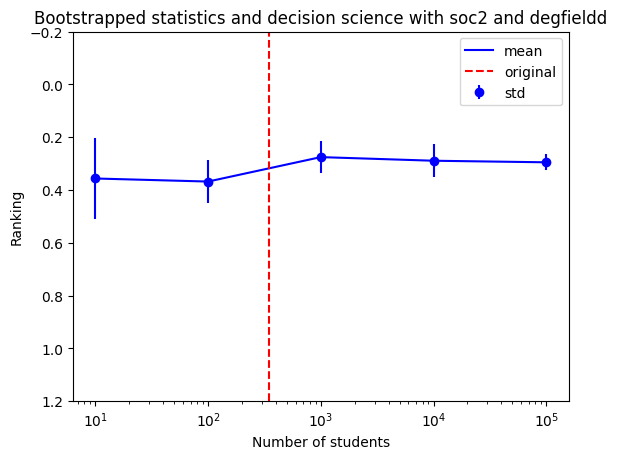

6107
28324


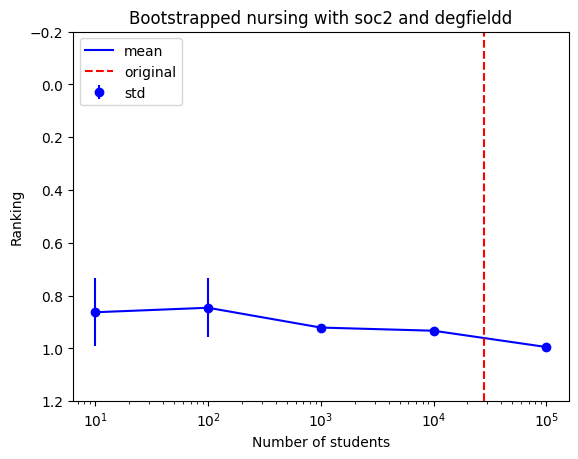

6201
20610


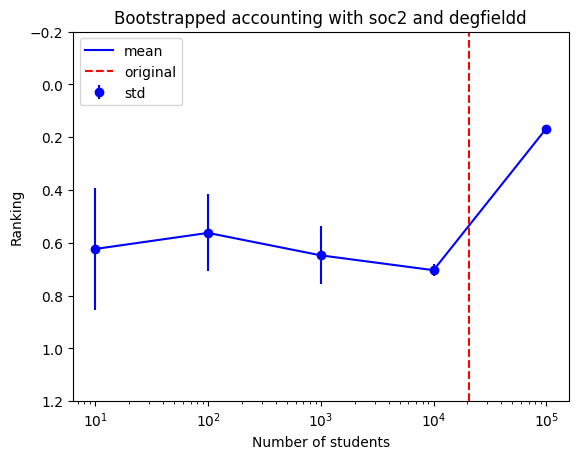

SOC4
degfield
2102
30840


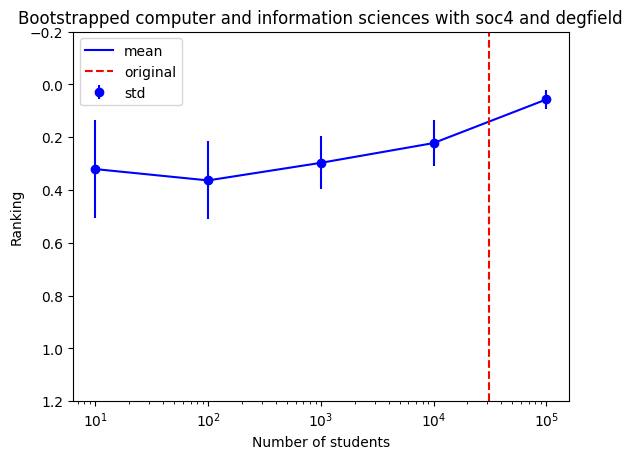

2300
47624


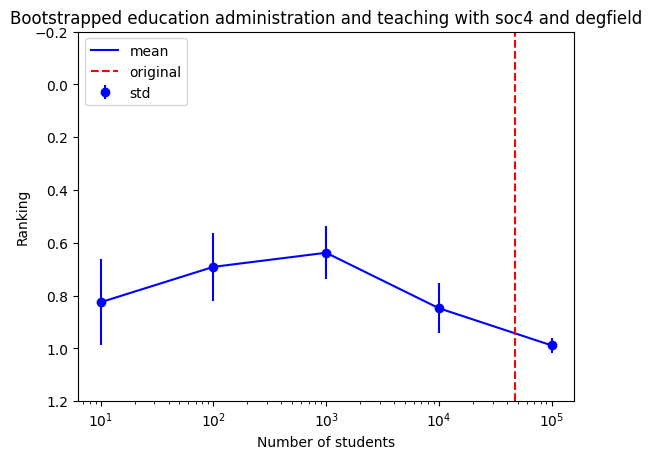

3702
5120


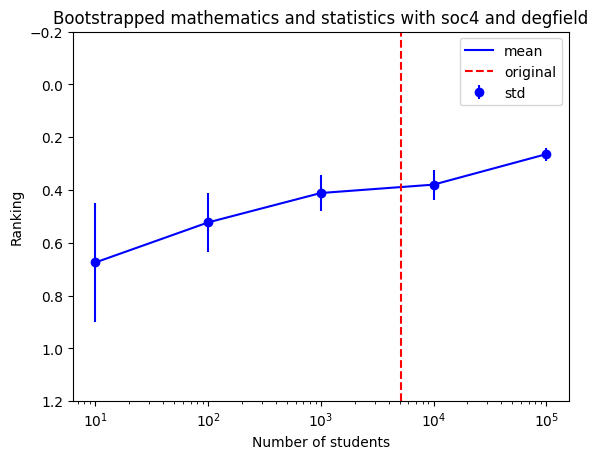

6107
44090


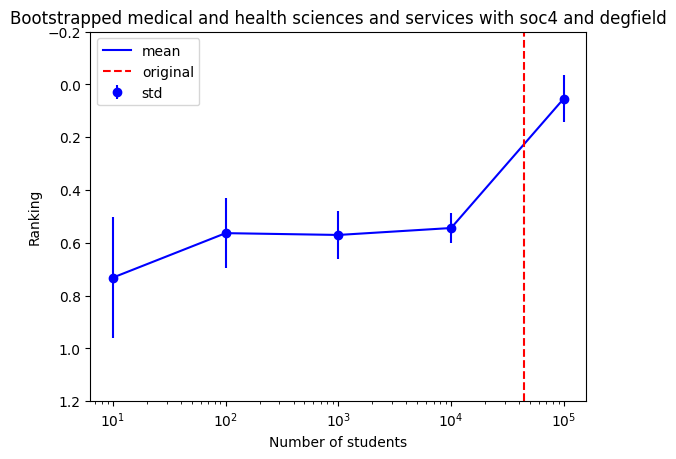

6201
157779


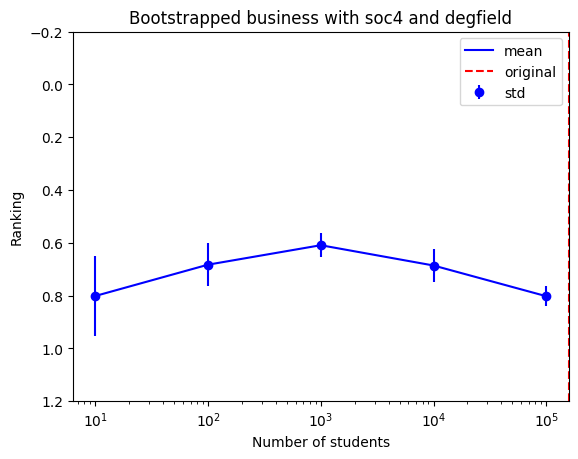

degfieldd
2102
18036


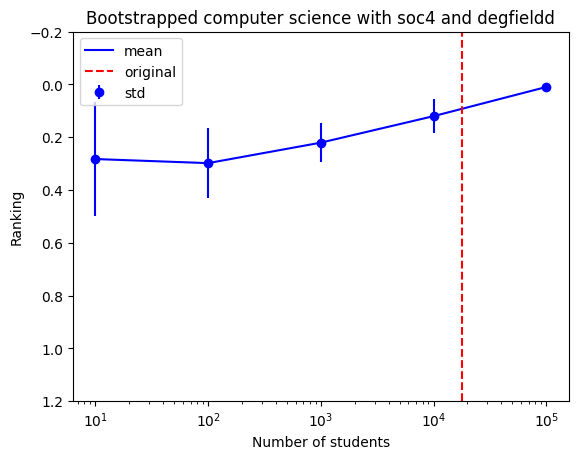

2300
11795


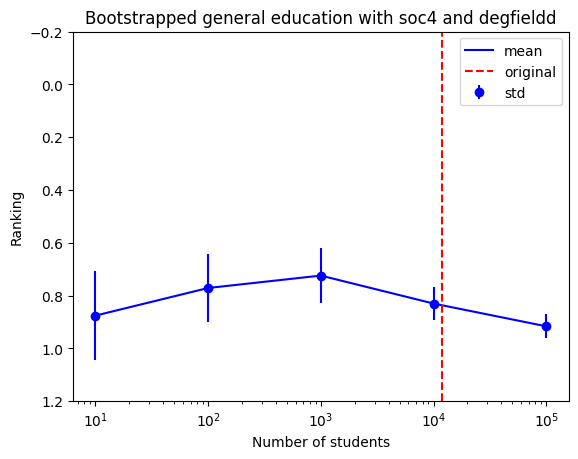

3702
349


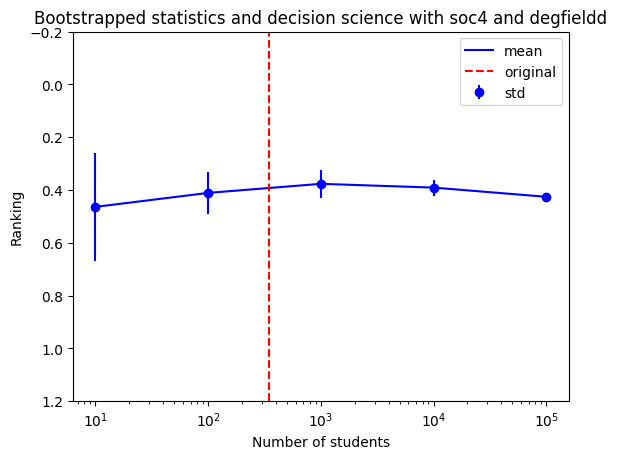

6107
28323


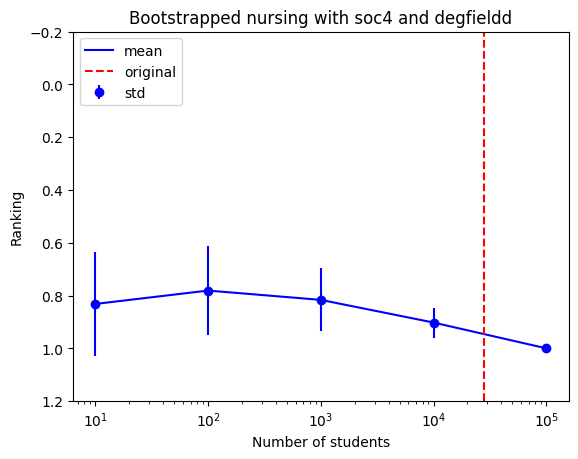

6201
20607


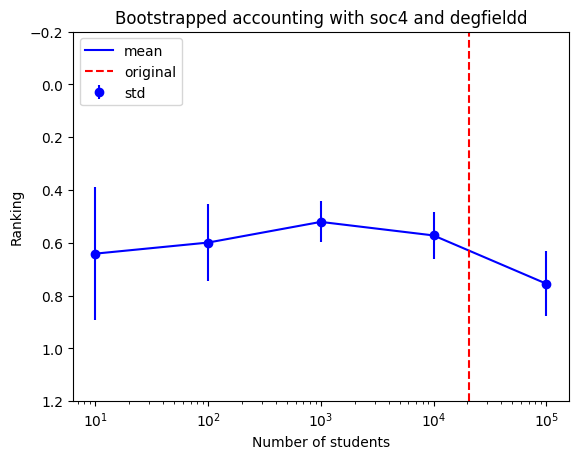

In [33]:

for soc_level in [2,4]:
    print(f'SOC{soc_level}')
    for major_var in ['degfield','degfieldd']:
        print(major_var)
        for target_major in [2102, 2300, 3702,6107,6201]:#
            print(target_major) 
            '''
            2102: computer science
            2300: general education
            3702: statistics and decision science
            6107: nursing
            6201: accounting
            '''
            major_i = target_major if major_var == 'degfieldd' else int(str(target_major)[:2])            

            major_name = df_degfield if major_var == 'degfield' else df_degfieldd
            major_name.index.name = 'major'
            adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)


            major_i_occ_ratio = adj_matrix.loc[major_i]/adj_matrix.loc[major_i].sum()
            major_i_original_num = adj_matrix.loc[major_i].sum()
            print(major_i_original_num)
            binary_matrix = binarize_by_rca(adj_matrix)
            mci_original = compute_mci_hajime(binary_matrix, iter=iterations)
            ranking_original = mci_original.iloc[:,-1].rank(ascending=True)


            major_i_ranking_iter = pd.DataFrame()
            major_i_sum_rca = pd.DataFrame()
            major_i_mci =  pd.DataFrame()

            for n in [10,100,1000,10000,100000]:
                major_i_rankings_ = []
                major_i_rca_ = []
                major_i_mci_ = []
                for i in range(100):
                    ranking_df = pd.DataFrame(index=adj_matrix.index)

                    simulated_outcome = np.random.choice(adj_matrix.columns,p=major_i_occ_ratio, size=n)
                    count = np.unique( simulated_outcome,return_counts=True)
                    count = pd.Series(count[1],index=count[0])

                    # Replace adj_matrix_simulation.loc[major_i] with count
                    adj_matrix_simulation = adj_matrix.copy()
                    adj_matrix_simulation.loc[major_i] = count

                    binary_matrix = binarize_by_rca(adj_matrix_simulation)
                    mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                    # Adjust the direction
                    major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                    major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                    if ranking[major_ref_top]>ranking[major_ref_bottom]:
                        mci_b_H = -mci_b_H
                        ranking = mci_b_H.iloc[:,-1].rank(ascending=True)


                    major_i_rankings_.append(ranking[major_i])
                    major_i_rca_.append(binary_matrix.loc[major_i].sum())
                    major_i_mci_.append(mci_b_H.iloc[:,-1].loc[major_i])
                major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
                major_i_sum_rca[n] = pd.Series(major_i_rca_).describe()
                major_i_mci[n] = pd.Series(major_i_mci_).describe()



            n_effective_majors = adj_matrix.shape[0]
            # Plot engineer_ranking_iter across n
            fig, ax = plt.subplots()
            ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
            ## Show std as error bar
            ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
            ax.set_xscale('log')
            #dashed vertical line for the actual number 
            ax.axvline(major_i_original_num, color='red', linestyle='--', label='original')
            ax.set_title(f'Bootstrapped {major_name.loc[major_i].values[0]} with soc{soc_level} and {major_var}')
            
            ax.set_xlabel('Number of students')
            ax.set_ylabel('Ranking')

            # Flip y-axis
            ax.invert_yaxis()
            # Fix y-axis in 0-1
            ax.set_ylim(1.2,-.2)


            # Save fig
            plt.legend()
            plt.savefig(f'../results_JHR_revision2/bootstrapped_{major_name.loc[major_i].values[0].replace(" ","_")}_soc{soc_level}_{major_var}_ranking.pdf')

            plt.show()


In [16]:
major_i_ranking_iter

,10,100,1000,10000,100000
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,105.660000,93.730000,81.570000,89.970000,117.670000
std,34.307646,22.653229,15.375604,16.154216,18.293927
min,16.000000,52.000000,50.000000,45.000000,87.000000
25%,85.750000,76.000000,70.000000,81.500000,101.500000
50%,110.500000,89.000000,83.000000,89.000000,117.000000
75%,128.750000,106.000000,89.000000,98.000000,130.500000
max,158.000000,148.000000,135.000000,125.000000,148.000000


In [17]:
soc_level = 2
major_var = 'degfieldd'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)

binary_matrix = binarize_by_rca(adj_matrix)
mci_original = compute_mci_hajime(binary_matrix, iter=iterations)
ranking_original = mci_original.iloc[:,-1].rank(ascending=True)


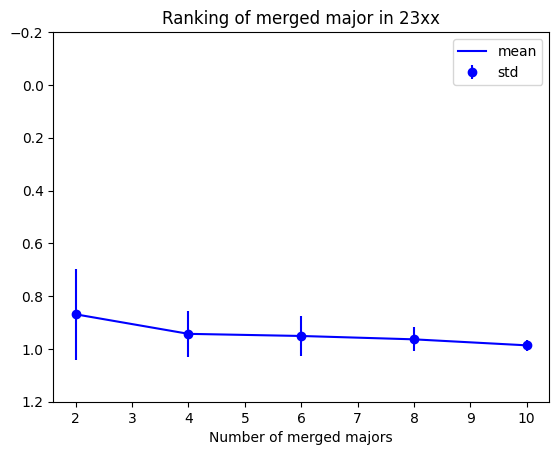

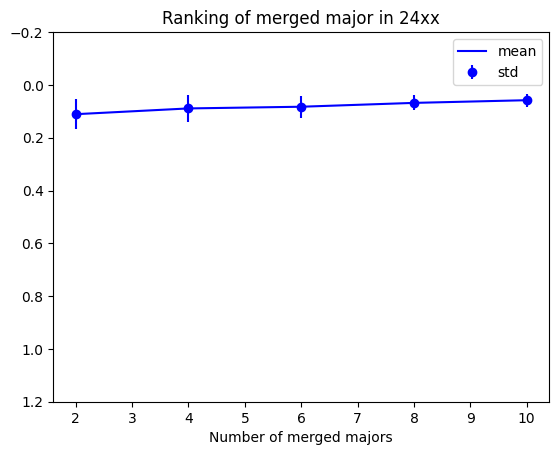

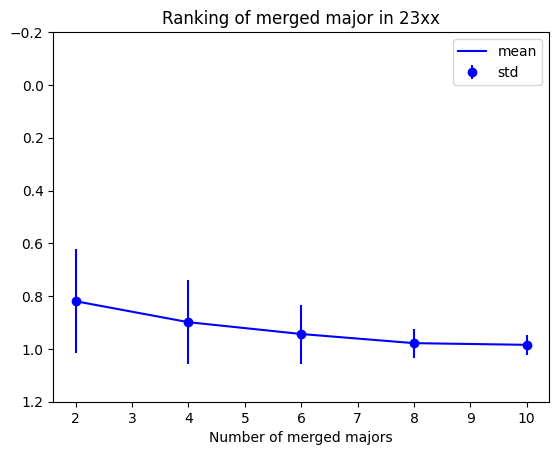

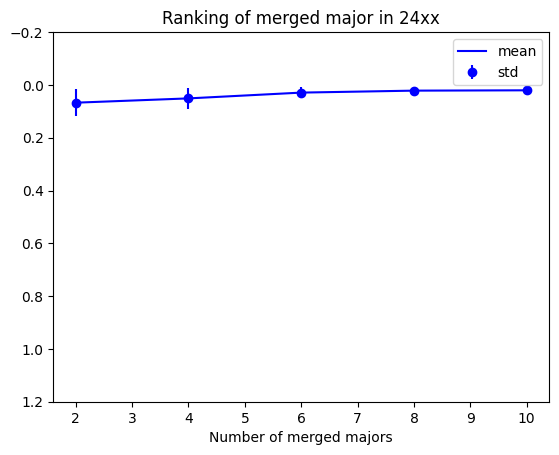

In [18]:
for soc_level in [2,4]:
    major_var = 'degfieldd'
    major_name = df_degfield if major_var == 'degfield' else df_degfieldd
    major_name.index.name = 'major'
    if binarize_method == 'rca':
        binarize_threshold = 1.

    # Read data
    adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)

    binary_matrix = binarize_by_rca(adj_matrix)
    mci_original = compute_mci_hajime(binary_matrix, iter=iterations)
    ranking_original = mci_original.iloc[:,-1].rank(ascending=True)


    # Merge all the majors that start from "23xx" by adding them up
    for m in ['23','24']:
        ''' 
        23: education administration and teaching
        24: engineering
        '''

        test_majors = adj_matrix.index[adj_matrix.index.astype(str).str.startswith(m)]

        # major_i_occ_ratio = adj_matrix.loc[major_i]/adj_matrix.loc[major_i].sum()
        # major_i_original_num = adj_matrix.loc[major_i].sum()
        # binary_matrix = binarize_by_rca(adj_matrix)
        # mci_original = compute_mci_hajime(binary_matrix, iter=iterations)
        # ranking_original = mci_original.iloc[:,-1].rank(ascending=True)

        major_i_ranking_iter = pd.DataFrame()
        major_i_sum_rca = pd.DataFrame()
        major_i_mci =  pd.DataFrame()
        major_i_change = pd.DataFrame()

        for n in [2,4,6,8,10]:
            major_i_rankings_ = []
            major_i_rca_ = []
            major_i_mci_ = []
            major_i_change_ = []
            for i in range(100):
                ranking_df = pd.DataFrame(index=adj_matrix.index)


                # Merge some of the education majors
                adj_matrix_simulation = adj_matrix.copy()
                ed_majors_to_merge = np.random.choice(test_majors, size=n, replace=False)
                mean_ranking_merged_major = ranking_original[ed_majors_to_merge].mean()
                median_ranking_merged_major = ranking_original[ed_majors_to_merge].median()


                adj_matrix_simulation.loc['merged_major'] = adj_matrix_simulation.loc[ed_majors_to_merge].sum()
                adj_matrix_simulation = adj_matrix_simulation.drop(ed_majors_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                ranking_change_from_median = ranking['merged_major'] - median_ranking_merged_major

                major_i_rankings_.append(ranking['merged_major'])
                major_i_rca_.append(binary_matrix.loc['merged_major'].sum())
                major_i_mci_.append(mci_b_H.iloc[:,-1].loc['merged_major'])
                major_i_change_.append(ranking_change_from_median)

            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            major_i_ranking_iter.loc['mean_of_merged',n] = mean_ranking_merged_major

            major_i_sum_rca[n] = pd.Series(major_i_rca_).describe()
            major_i_mci[n] = pd.Series(major_i_mci_).describe()

            major_i_change[n] = pd.Series(major_i_change_).describe()

        n_effective_majors = adj_matrix.shape[0]-np.array([2,4,6,8,10])+1

        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(f'Ranking of merged major in {m}xx')
        # Flip y-axis
        ax.invert_yaxis()
        # Fix y-axis in 0-1
        ax.set_ylim(1.2,-.2)

        ax.set_xlabel('Number of merged majors')

        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merged_{m}xx_ranking_in_degfieldd_soc{soc_level}.pdf')


        '''
        # Plot change of the ranking
        fig, ax = plt.subplots()
        ax.plot(major_i_change.loc['mean'], label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_change.columns, major_i_change.loc['mean'], yerr=major_i_change.loc['std'], fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(f'Ranking change of merged major in {m}xx from median')
        # Flip y-axis
        ax.invert_yaxis()

        ax.set_xlabel('Number of merged majors')

        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merged_{m}xx_ranking_change_in_degfieldd_soc{soc_level}.pdf')
        '''

(1.2, -0.2)

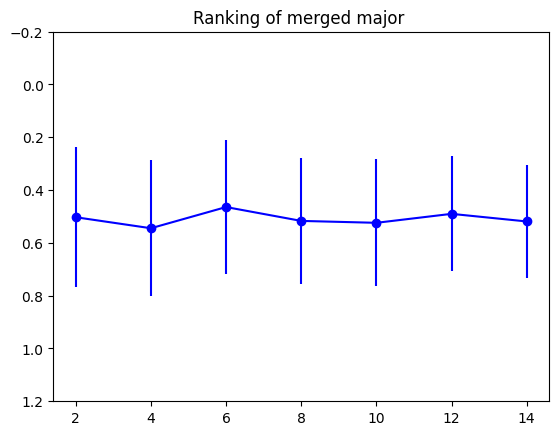

In [19]:
# Merge randomly selected majors
test_majors = adj_matrix.index

major_i_ranking_iter = pd.DataFrame()
major_i_sum_rca = pd.DataFrame()
major_i_mci =  pd.DataFrame()

for n in [2,4,6,8,10,12,14]:
    major_i_rankings_ = []
    major_i_rca_ = []
    major_i_mci_ = []
    for i in range(100):
        ranking_df = pd.DataFrame(index=adj_matrix.index)


        # Merge some of the education majors
        adj_matrix_simulation = adj_matrix.copy()
        ed_majors_to_merge = np.random.choice(test_majors, size=n, replace=False)
        adj_matrix_simulation.loc['merged_major'] = adj_matrix_simulation.loc[ed_majors_to_merge].sum()
        adj_matrix_simulation = adj_matrix_simulation.drop(ed_majors_to_merge)

        binary_matrix = binarize_by_rca(adj_matrix_simulation)
        mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
        ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
        # Adjust the direction
        major_ref_top = ranking.index[ranking.index.astype(str).str.startswith('21')][0]
        major_ref_bottom = ranking.index[ranking.index.astype(str).str.startswith('60')][0]
        if ranking[major_ref_top]>ranking[major_ref_bottom]:
            mci_b_H = -mci_b_H
            ranking = mci_b_H.iloc[:,-1].rank(ascending=True)


        major_i_rankings_.append(ranking['merged_major'])
        major_i_rca_.append(binary_matrix.loc['merged_major'].sum())
        major_i_mci_.append(mci_b_H.iloc[:,-1].loc['merged_major'])
    major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
    major_i_sum_rca[n] = pd.Series(major_i_rca_).describe()
    major_i_mci[n] = pd.Series(major_i_mci_).describe()


n_effective_majors = adj_matrix.shape[0]-np.array([2,4,6,8,10,12,14])+1

# Plot engineer_ranking_iter across n
fig, ax = plt.subplots()
ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
## Show std as error bar
ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
#dashed vertical line for the actual number 
ax.set_title(f'Ranking of merged major ')
# Flip y-axis
ax.invert_yaxis()
# Fix y-axis in 0-1
ax.set_ylim(1.2,-.2)


In [20]:
soc_level = 2
major_var = 'degfield'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)
# Print df_degfieldd without truncation
pd.set_option('display.max_rows', None)

# df_degfield['degfield_s']

(1.2, -0.2)

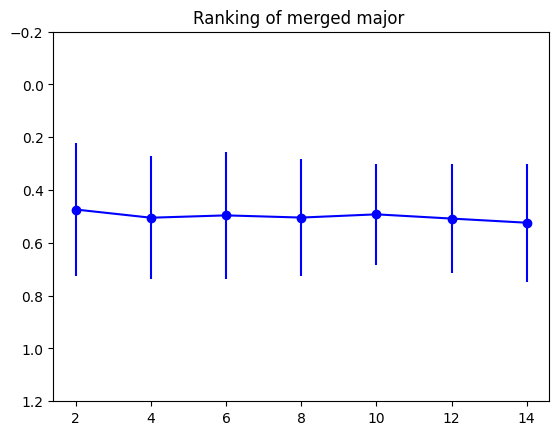

In [22]:
# Merge randomly selected majors

test_majors = adj_matrix.index

major_i_ranking_iter = pd.DataFrame()
major_i_sum_rca = pd.DataFrame()
major_i_mci =  pd.DataFrame()

for n in [2,4,6,8,10,12,14]:
    major_i_rankings_ = []
    major_i_rca_ = []
    major_i_mci_ = []
    for i in range(100):
        ranking_df = pd.DataFrame(index=adj_matrix.index)


        # Merge some of the education majors
        adj_matrix_simulation = adj_matrix.copy()
        ed_majors_to_merge = np.random.choice(test_majors, size=n, replace=False)
        adj_matrix_simulation.loc['merged_major'] = adj_matrix_simulation.loc[ed_majors_to_merge].sum()
        adj_matrix_simulation = adj_matrix_simulation.drop(ed_majors_to_merge)

        binary_matrix = binarize_by_rca(adj_matrix_simulation)
        mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
        ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
        # Adjust the direction
        try:
            major_ref_top = ranking.index[ranking.index.isin([21,24,14,37,25,50,36])][0]
        except:
            major_ref_top = 'merged_major'
        try:
            major_ref_bottom = ranking.index[ranking.index.isin([60,64,35,26,29,48,53])][0]
        except:
            major_ref_top = 'merged_major'
        if ranking[major_ref_top]>ranking[major_ref_bottom]:
            mci_b_H = -mci_b_H
            ranking = mci_b_H.iloc[:,-1].rank(ascending=True)


        major_i_rankings_.append(ranking['merged_major'])
        major_i_rca_.append(binary_matrix.loc['merged_major'].sum())
        major_i_mci_.append(mci_b_H.iloc[:,-1].loc['merged_major'])
    major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
    major_i_sum_rca[n] = pd.Series(major_i_rca_).describe()
    major_i_mci[n] = pd.Series(major_i_mci_).describe()


n_effective_majors = adj_matrix.shape[0]-np.array([2,4,6,8,10,12,14])+1

# Plot engineer_ranking_iter across n
fig, ax = plt.subplots()
ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
## Show std as error bar
ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
#dashed vertical line for the actual number 
ax.set_title(f'Ranking of merged major ')
# Flip y-axis
ax.invert_yaxis()
# Fix y-axis in 0-1
ax.set_ylim(1.2,-.2)


In [23]:
soc_level = 2
major_var = 'degfield'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)
adj_matrix_degfieldd = pd.read_csv(f'../data/processed_data/acs/adj_degfieldd_soc{soc_level}.csv',index_col=0)


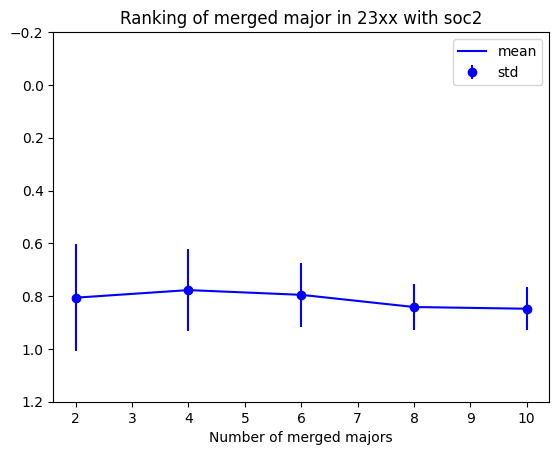

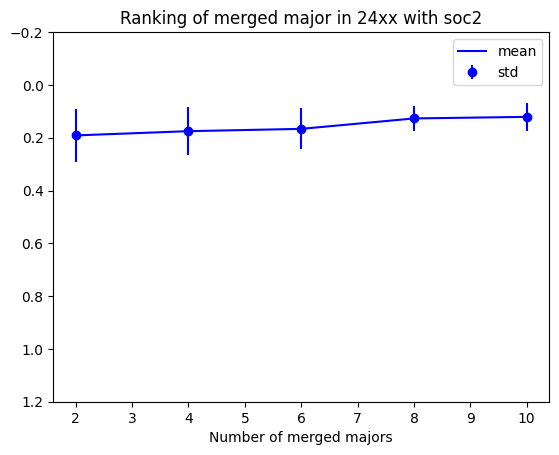

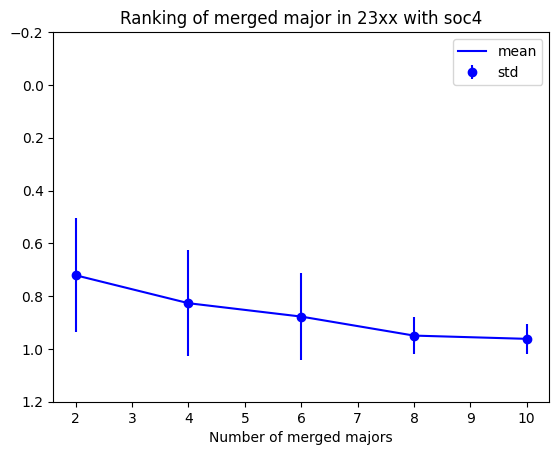

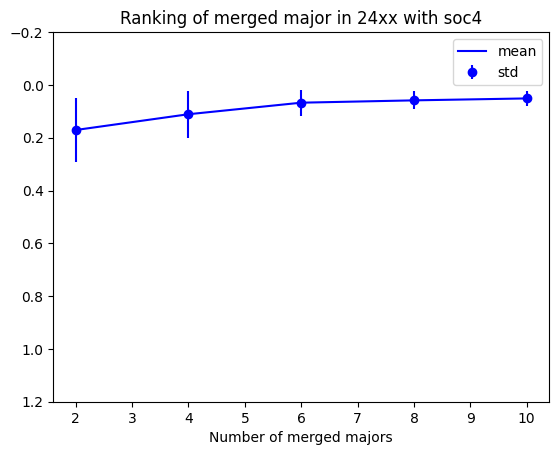

In [24]:
for soc_level in [2,4]:
    major_var = 'degfield'
    major_name = df_degfield if major_var == 'degfield' else df_degfieldd
    major_name.index.name = 'major'
    if binarize_method == 'rca':
        binarize_threshold = 1.

    # Read data
    adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)
    adj_matrix_degfieldd = pd.read_csv(f'../data/processed_data/acs/adj_degfieldd_soc{soc_level}.csv',index_col=0)

    for m in ['23','24']:
        '''
        23: education administration and teaching
        24: engineering
        '''

        test_majors = adj_matrix_degfieldd.index[adj_matrix_degfieldd.index.astype(str).str.startswith(m)]

        adj_matrix_ed_detailed = adj_matrix.copy()
        ## add test_majors as new rows
        for major in test_majors:
            adj_matrix_ed_detailed.loc[major] = adj_matrix_degfieldd.loc[major]

        # Remove 23
        adj_matrix_ed_detailed = adj_matrix_ed_detailed.drop([int(m)])

        major_i_ranking_iter = pd.DataFrame()
        major_i_sum_rca = pd.DataFrame()
        major_i_mci =  pd.DataFrame()
        major_i_change = pd.DataFrame()
        for n in [2,4,6,8,10]:
            major_i_rankings_ = []
            major_i_rca_ = []
            major_i_mci_ = []
            major_i_change_ = []
            for i in range(100):
                # Merge some of the education majors
                adj_matrix_simulation = adj_matrix_ed_detailed.copy()
                ed_majors_to_merge = np.random.choice(test_majors, size=n, replace=False)
                mean_ranking_merged_major = ranking_original[ed_majors_to_merge].mean()
                median_ranking_merged_major = ranking_original[ed_majors_to_merge].median()


                adj_matrix_simulation.loc['merged_major'] = adj_matrix_simulation.loc[ed_majors_to_merge].sum()
                adj_matrix_simulation = adj_matrix_simulation.drop(ed_majors_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                ranking_change_from_median = ranking['merged_major'] - median_ranking_merged_major

                major_i_rankings_.append(ranking['merged_major'])
                major_i_rca_.append(binary_matrix.loc['merged_major'].sum())
                major_i_mci_.append(mci_b_H.iloc[:,-1].loc['merged_major'])
                major_i_change_.append(ranking_change_from_median)
            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            major_i_ranking_iter.loc['mean_of_merged',n] = mean_ranking_merged_major

            major_i_sum_rca[n] = pd.Series(major_i_rca_).describe()
            major_i_mci[n] = pd.Series(major_i_mci_).describe()

            major_i_change[n] = pd.Series(major_i_change_).describe()

        n_effective_majors = adj_matrix_ed_detailed.shape[0]-np.array([2,4,6,8,10])+1


        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(f'Ranking of merged major in {m}xx with soc{soc_level}')
        # Flip y-axis
        ax.invert_yaxis()
        # Fix y-axis in 0-1
        ax.set_ylim(1.2,-.2)

        ax.set_xlabel('Number of merged majors')

        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merged_{m}xx_ranking_in_degfield_soc{soc_level}.pdf')



        '''
        # Plot change of the ranking
        fig, ax = plt.subplots()
        ax.plot(major_i_change.loc['mean'], label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_change.columns, major_i_change.loc['mean'], yerr=major_i_change.loc['std'], fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(f'Ranking change of merged major in {m}xx from median with soc{soc_level}')
        # Flip y-axis
        ax.invert_yaxis()

        ax.set_xlabel('Number of merged majors')

        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merged_{m}xx_ranking_change_in_degfield_soc{soc_level}.pdf')
        '''


In [25]:
soc_level=4
major_var = 'degfield'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc{soc_level}.csv',index_col=0)
o ='25'
test_occupations = adj_matrix.columns[adj_matrix.columns.astype(str).str.startswith(o)]


In [26]:
# adj_matrix_soc4.columns[adj_matrix_soc4.columns.astype(str).str.startswith('17')]

o,m: 17 23
o,m: 17 24
o,m: 25 23
o,m: 25 24


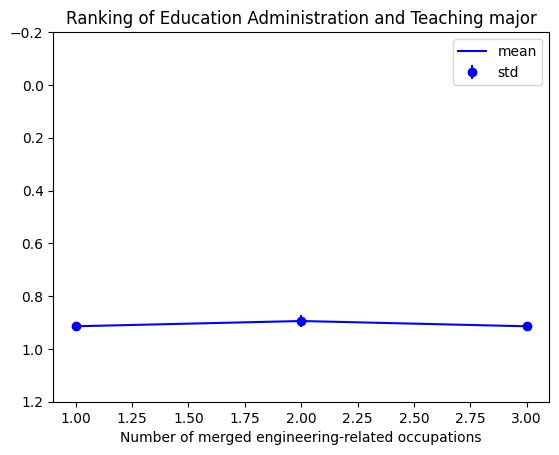

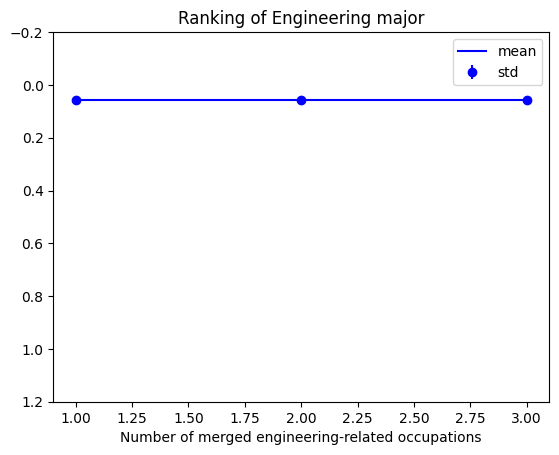

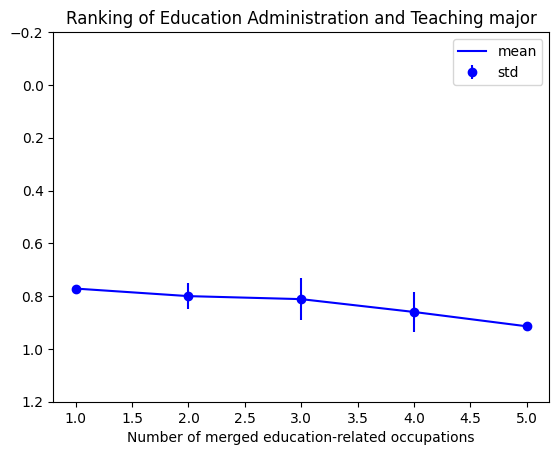

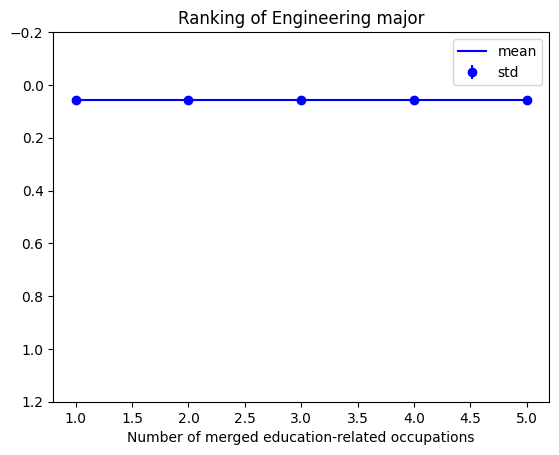

In [34]:
#Merging occupations

major_var = 'degfield'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc2.csv',index_col=0)
adj_matrix_soc4 = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc4.csv',index_col=0)


for o in ['17','25']:
    ''' 
    17:Architecture & Engineering Occupations
    25:Education, Training, & Library Occupations
    '''
    xlabel = 'Number of merged education-related occupations' if o=='25' else 'Number of merged engineering-related occupations'
    for m in ['23','24']:
        '''
        23: education administration and teaching
        24: engineering
        '''
        title = f'Ranking of Education Administration and Teaching major' if m=='23' else f'Ranking of Engineering major'
        print('o,m:',o,m)
        test_occupations = adj_matrix_soc4.columns[adj_matrix_soc4.columns.astype(str).str.startswith(o)]
        major_i_ranking_iter = pd.DataFrame()
        max_n = 5 if o=='25' else 3
        for n in range(1,max_n+1):
            rankings_ = []
            major_i_rankings_ = []
            for i in range(20):
                adj_matrix_ed_detailed = adj_matrix.copy()
                ## add test_majors as new rows
                for occ in test_occupations:
                    adj_matrix_ed_detailed.loc[:,occ] = adj_matrix_soc4.loc[:,occ]
                # Remove 23
                adj_matrix_ed_detailed = adj_matrix_ed_detailed.drop(columns=[o])

                # Merge some of the education occupations
                adj_matrix_simulation = adj_matrix_ed_detailed.copy()
                ed_occs_to_merge = np.random.choice(test_occupations, size=n, replace=False)


                adj_matrix_simulation.loc[:,'merged_occ'] = adj_matrix_ed_detailed.loc[:,ed_occs_to_merge].sum(axis=1)
                adj_matrix_simulation = adj_matrix_simulation.drop(columns=ed_occs_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                rankings_.append(ranking)

                major_i_rankings_.append(ranking[int(m)])
            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            pd.concat(rankings_,axis=1)

        n_effective_majors = adj_matrix.shape[0]
        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(title)
        # Flip y-axis
        ax.invert_yaxis()
        ax.set_ylim(1.2,-.2)


        ax.set_xlabel(xlabel)


        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merge_occ_{o}xx_ranking_{m}_soc2.pdf')


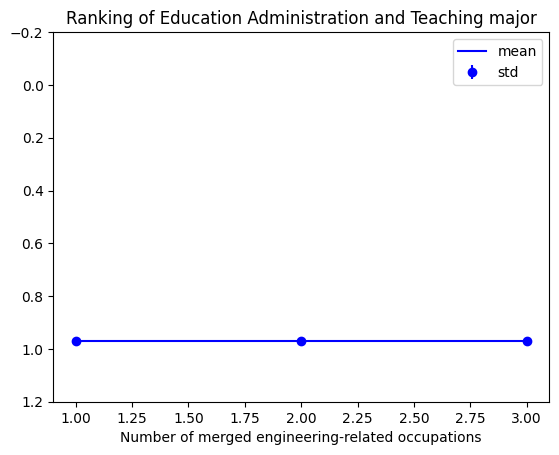

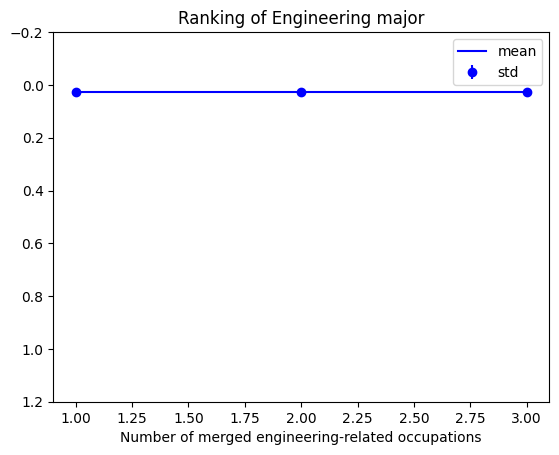

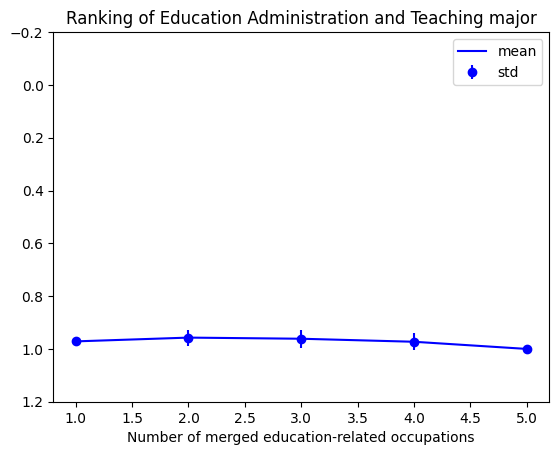

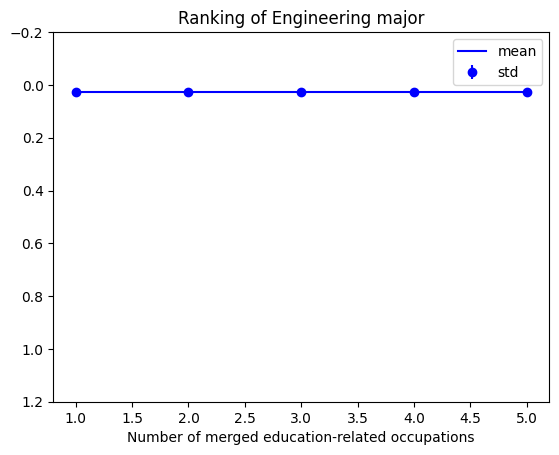

In [35]:
# Merging occupations, at soc4 level
major_var = 'degfield'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc2.csv',index_col=0)
adj_matrix_soc4 = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc4.csv',index_col=0)


for o in ['17','25']:
    '''
    17:Architecture & Engineering Occupations
    25:Education, Training, & Library Occupations
    '''
    xlabel = 'Number of merged education-related occupations' if o=='25' else 'Number of merged engineering-related occupations'
    for m in ['23','24']:
        '''
        23: education administration and teaching
        24: engineering
        '''
        title = f'Ranking of Education Administration and Teaching major' if m=='23' else f'Ranking of Engineering major'
        test_occupations = adj_matrix_soc4.columns[adj_matrix_soc4.columns.astype(str).str.startswith(o)]

        major_i_ranking_iter = pd.DataFrame()
        max_n = 5 if o=='25' else 3
        for n in range(1,max_n+1):
            rankings_ = []
            major_i_rankings_ = []
            for i in range(20):
                adj_matrix_ed_detailed = adj_matrix_soc4.copy()

                # Merge some of the education occupations
                adj_matrix_simulation = adj_matrix_ed_detailed.copy()
                ed_occs_to_merge = np.random.choice(test_occupations, size=n, replace=False)


                adj_matrix_simulation.loc[:,'merged_occ'] = adj_matrix_ed_detailed.loc[:,ed_occs_to_merge].sum(axis=1)
                adj_matrix_simulation = adj_matrix_simulation.drop(columns=ed_occs_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                rankings_.append(ranking)

                major_i_rankings_.append(ranking[int(m)])
            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            pd.concat(rankings_,axis=1)

        n_effective_majors = adj_matrix.shape[0]
        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(title)
        # Flip y-axis
        ax.invert_yaxis()
        ax.set_ylim(1.2,-.2)

        ax.set_xlabel(xlabel)


        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merge_occ_{o}xx_ranking_{m}_soc4.pdf')


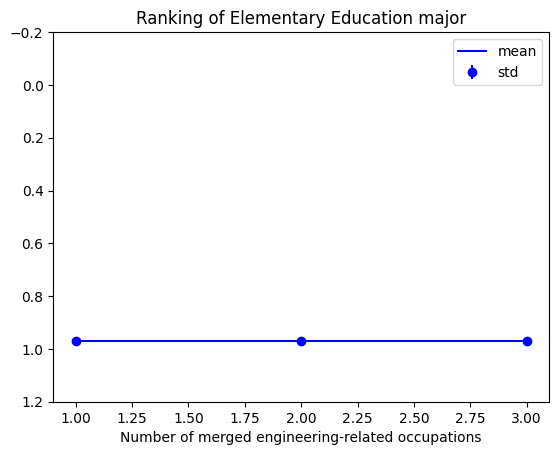

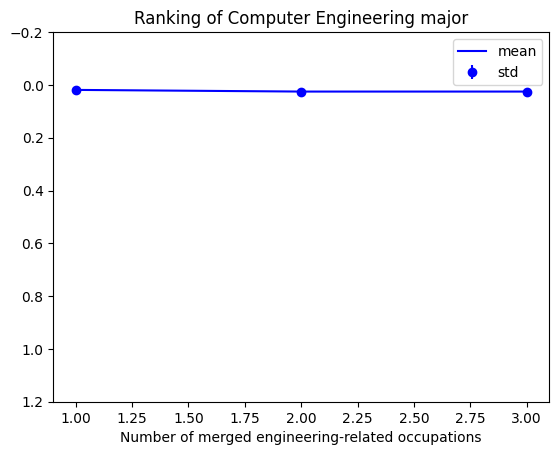

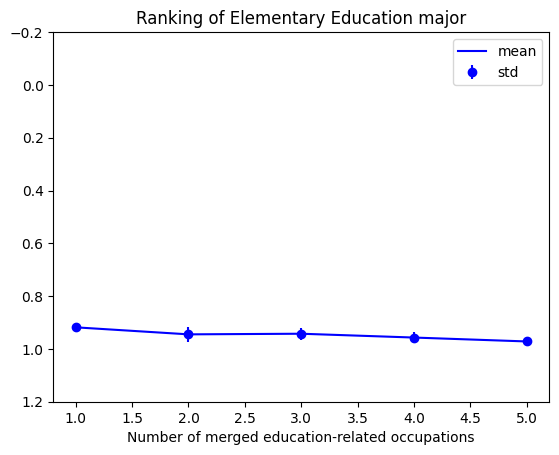

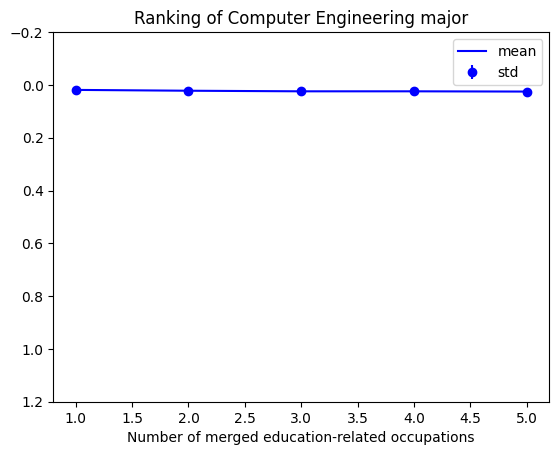

In [29]:
# Merging occupations, at soc2 and degfieldd level
major_var = 'degfieldd'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc2.csv',index_col=0)
adj_matrix_soc4 = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc4.csv',index_col=0)



for o in ['17','25']:
    '''
    17:Architecture & Engineering Occupations
    25:Education, Training, & Library Occupations
    '''
    xlabel = 'Number of merged education-related occupations' if o=='25' else 'Number of merged engineering-related occupations'
    for m in ['2304','2407']:
        ''' 
        2304: elementary education
        2407: computer engineering
        '''
        title = f'Ranking of Elementary Education major' if m=='2304' else f'Ranking of Computer Engineering major'
        test_occupations = adj_matrix_soc4.columns[adj_matrix_soc4.columns.astype(str).str.startswith(o)]

        major_i_ranking_iter = pd.DataFrame()
        max_n = 5 if o=='25' else 3
        for n in range(1,max_n+1):
            rankings_ = []
            major_i_rankings_ = []
            for i in range(20):
                adj_matrix_ed_detailed = adj_matrix.copy()
                ## add test_majors as new rows
                for occ in test_occupations:
                    adj_matrix_ed_detailed.loc[:,occ] = adj_matrix_soc4.loc[:,occ]
                # Remove 23
                adj_matrix_ed_detailed = adj_matrix_ed_detailed.drop(columns=o)

                # Merge some of the education majors
                adj_matrix_simulation = adj_matrix_ed_detailed.copy()
                ed_occs_to_merge = np.random.choice(test_occupations, size=n, replace=False)


                adj_matrix_simulation.loc[:,'merged_occ'] = adj_matrix_ed_detailed.loc[:,ed_occs_to_merge].sum(axis=1)
                adj_matrix_simulation = adj_matrix_simulation.drop(columns=ed_occs_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                rankings_.append(ranking)

                major_i_rankings_.append(ranking[int(m)])
            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            pd.concat(rankings_,axis=1)
        n_effective_majors = adj_matrix.shape[0]

        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(title)
        # Flip y-axis
        ax.invert_yaxis()
        ax.set_ylim(1.2,-.2)

        ax.set_xlabel(xlabel)


        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merge_occ_{o}xx_ranking_{m}_soc2.pdf')


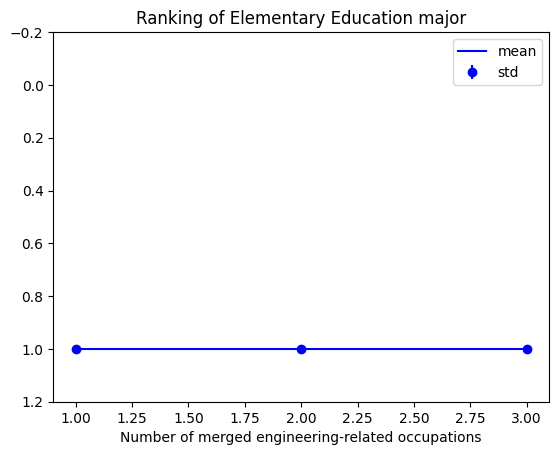

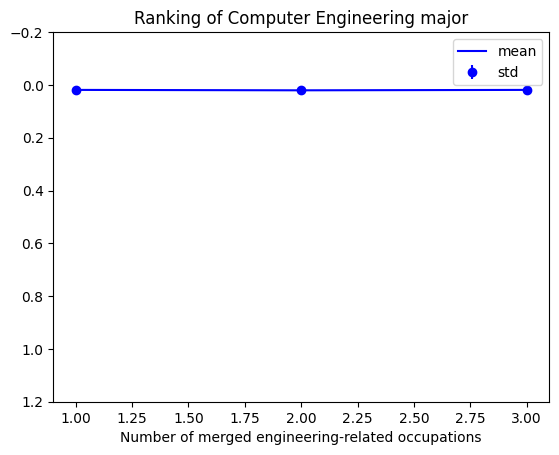

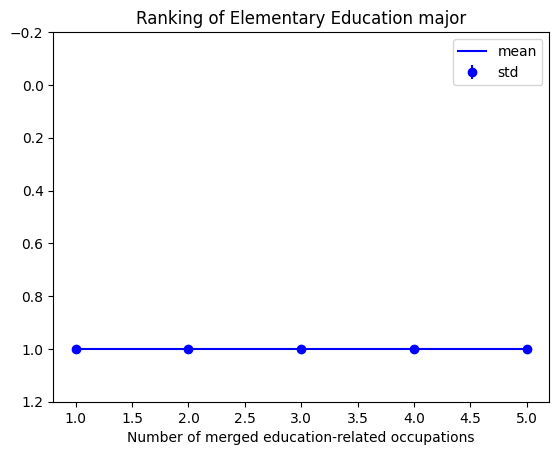

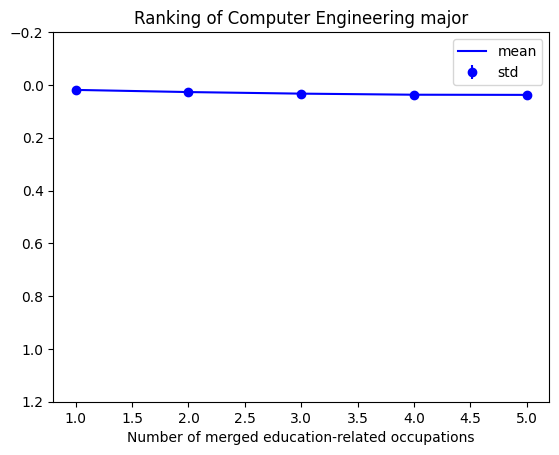

In [30]:
# Merging occupations, at soc4 and degfieldd level

major_var = 'degfieldd'
major_name = df_degfield if major_var == 'degfield' else df_degfieldd
major_name.index.name = 'major'
if binarize_method == 'rca':
    binarize_threshold = 1.

# Read data
adj_matrix = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc2.csv',index_col=0)
adj_matrix_soc4 = pd.read_csv(f'../data/processed_data/acs/adj_{major_var}_soc4.csv',index_col=0)


for o in ['17','25']:
    ''' 
    17:Architecture & Engineering Occupations
    25:Education, Training, & Library Occupations
    '''
    xlabel = 'Number of merged education-related occupations' if o=='25' else 'Number of merged engineering-related occupations'
    for m in ['2304','2407']:
        ''' 
        2304: elementary education
        2407: computer engineering
        '''
        title = f'Ranking of Elementary Education major' if m=='2304' else f'Ranking of Computer Engineering major'
        test_occupations = adj_matrix_soc4.columns[adj_matrix_soc4.columns.astype(str).str.startswith(o)]



        major_i_ranking_iter = pd.DataFrame()
        max_n = 5 if o=='25' else 3
        for n in range(1,max_n+1):
            rankings_ = []
            major_i_rankings_ = []
            for i in range(20):
                adj_matrix_ed_detailed = adj_matrix_soc4.copy()

                # Merge some of the education occupations
                adj_matrix_simulation = adj_matrix_ed_detailed.copy()
                ed_occs_to_merge = np.random.choice(test_occupations, size=n, replace=False)


                adj_matrix_simulation.loc[:,'merged_occ'] = adj_matrix_ed_detailed.loc[:,ed_occs_to_merge].sum(axis=1)
                adj_matrix_simulation = adj_matrix_simulation.drop(columns=ed_occs_to_merge)

                binary_matrix = binarize_by_rca(adj_matrix_simulation)
                mci_b_H = compute_mci_hajime(binary_matrix, iter=iterations)
                ranking = mci_b_H.iloc[:,-1].rank(ascending=True)
                # Adjust the direction
                major_ref_top = major_ref_top_degfieldd if major_var == 'degfieldd' else major_ref_top_degfield
                major_ref_bottom = major_ref_bottom_degfieldd if major_var == 'degfieldd' else major_ref_bottom_degfield
                if ranking[major_ref_top]>ranking[major_ref_bottom]:
                    mci_b_H = -mci_b_H
                    ranking = mci_b_H.iloc[:,-1].rank(ascending=True)

                rankings_.append(ranking)

                major_i_rankings_.append(ranking[int(m)])
            major_i_ranking_iter[n] = pd.Series(major_i_rankings_).describe()
            pd.concat(rankings_,axis=1)

        n_effective_majors = adj_matrix.shape[0]

        # Plot engineer_ranking_iter across n
        fig, ax = plt.subplots()
        ax.plot(major_i_ranking_iter.loc['mean']/n_effective_majors, label='mean',color='blue')
        ## Show std as error bar
        ax.errorbar(major_i_ranking_iter.columns, major_i_ranking_iter.loc['mean']/n_effective_majors, yerr=major_i_ranking_iter.loc['std']/n_effective_majors, fmt='o', label='std',color='blue')
        #dashed vertical line for the actual number 
        ax.set_title(title)
        # Flip y-axis
        ax.invert_yaxis()
        ax.set_ylim(1.2,-.2)

        ax.set_xlabel(xlabel)


        # Save fig
        plt.legend()
        plt.savefig(f'../results_JHR_revision2/merge_occ_{o}xx_ranking_{m}_soc4.pdf')
